In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import classification_report

# Loading the Data 

In [2]:
# Loading the input data in pandas dataframe
x_train = pd.read_csv("df_train_2.csv", header = [0]) 
x_test = pd.read_csv("df_test_2.csv", header = [0]) 
print("Training Shape:", x_train.shape,", Testing Shape:", x_test.shape)

Training Shape: (75000, 1965) , Testing Shape: (25000, 1965)


In [3]:
# Loading the output data in pandas dataframe
y_train = pd.read_csv("y_train.csv",header=None)
y_test = pd.read_csv("y_test.csv",header=None)

In [4]:
# Converting the inputs and outputs to the numpy array
X_train = x_train.copy().to_numpy()
X_test = x_test.copy().to_numpy()
Y_train = y_train.copy().to_numpy().reshape(-1)
Y_test = y_test.copy().to_numpy().reshape(-1)

## Mulitnomail NB

In [5]:

from sklearn.naive_bayes import MultinomialNB 

# arr stores the values of learning rates to be considered
arr = [0.0000000001,0.00000001,0.000001,0.00001,0.001,0.01,0.1,0.5,1,5,10,50,100,500,1000,10000,100000,10000000]

train_score = []                                           # for storing train score for different values of learning rate
test_score = []                                            # for storing test score for different values of learning rate  



print("------------------ Results for Mulitnomial NB ------------------")

for i in arr:
    
    # training the model on X_train 
    model = MultinomialNB(alpha = i)
    model.fit(X_train, Y_train)
    
    # getting the accuracy on training and testing data
    train_score_ = model.score(X_train, Y_train)
    test_score_ = model.score(X_test, Y_test)
    
    # adding the train and test accuracy to train_score and test_score respectively
    train_score.append(train_score_)
    test_score.append(test_score_)

    print(i,"testing:",test_score_," ","training:",train_score_)
    


------------------ Results for Mulitnomial NB ------------------
alpha = 1e-10 testing: 0.78124 training: 0.84516 
alpha = 1e-08 testing: 0.78432 training: 0.8441733333333333 
alpha = 1e-06 testing: 0.78844 training: 0.8429466666666666 
alpha = 1e-05 testing: 0.79052 training: 0.8417733333333334 
alpha = 0.001 testing: 0.79444 training: 0.8382666666666667 
alpha = 0.01 testing: 0.7968 training: 0.8358266666666667 
alpha = 0.1 testing: 0.79752 training: 0.8319733333333333 
alpha = 0.5 testing: 0.79764 training: 0.8284666666666667 
alpha = 1 testing: 0.79776 training: 0.8265333333333333 
alpha = 5 testing: 0.79792 training: 0.82124 
alpha = 10 testing: 0.79784 training: 0.8197466666666666 
alpha = 50 testing: 0.79232 training: 0.80588 
alpha = 100 testing: 0.7778 training: 0.7900266666666667 
alpha = 500 testing: 0.73264 training: 0.7441066666666667 
alpha = 1000 testing: 0.7096 training: 0.72024 
alpha = 10000 testing: 0.65616 training: 0.66388 
alpha = 100000 testing: 0.60672 training:

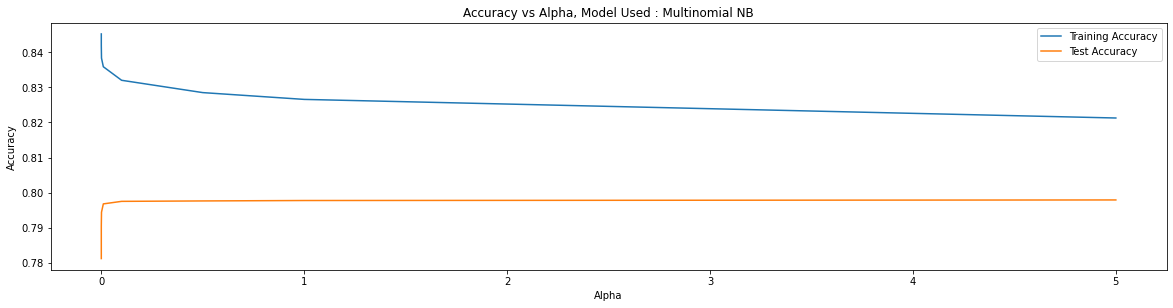

In [6]:
size = 10
import matplotlib.pyplot as plt
# plotting the loss vs iteration graph for training and validation data
figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
subplot.plot(arr[:size], train_score[:size], label = "Training Accuracy")
subplot.plot(arr[:size], test_score[:size], label = "Test Accuracy")
# subplot.scatter(X_iteration, Y_train_error)
subplot.set_title("Accuracy vs Alpha, Model Used : Logistic Regression (L2 Regularization)")
subplot.set_xlabel("Alpha")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")


In [8]:
"""  ------------ Best Model  -----------------"""

from sklearn.naive_bayes import MultinomialNB 

model = MultinomialNB(alpha = 5)
model.fit(X_train, Y_train)

#Classification Report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# print("")
print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))

#saving the classifier 
import joblib

joblib_file = "MultinomialNB_model.pkl"  
joblib.dump(model, joblib_file)


Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.63      0.81      0.71       735
         2.0       0.70      0.59      0.64       755
         3.0       0.91      0.97      0.94       779
         4.0       0.89      0.87      0.88       752
         5.0       0.96      0.95      0.95       767
         6.0       0.76      0.91      0.83       730
         7.0       0.90      0.92      0.91       743
         8.0       0.98      0.97      0.97       754
         9.0       0.98      0.97      0.97       741
        10.0       0.73      0.68      0.70       753
        11.0       0.78      0.80      0.79       738
        12.0       0.76      0.78      0.77       744
        13.0       0.95      0.98      0.96       742
        14.0       0.77      0.52      0.62       762
        15.0       0.63      0.54      0.58       769
        16.0       0.47      0.32      0.38       729
        17.0       0.80      0.88      0.83       

## Bernoulli NB

In [9]:
from sklearn.naive_bayes import BernoulliNB 
# arr stores the values of learning rates to be considered
arr = [0.00000001,0.0000001, 0.000001,0.00001,0.001,0.01,0.1,0.5,1,5,10,50,100]


train_score = []                                           # for storing train score for different values of learning rate
test_score = []                                            # for storing test score for different values of learning rate  

print("------------------ Results for Bernoulli NB ------------------")

for alpha in arr:
    
    # training the model on X_train 
    model = BernoulliNB(alpha = alpha, binarize = 0.5)
    
    model.fit(X_train, Y_train)
    
    # getting the accuracy on training and testing data
    train_score_ = model.score(X_train, Y_train)
    test_score_ = model.score(X_test, Y_test)
    
    # adding the train and test accuracy to train_score and test_score respectively
    train_score.append(train_score_)
    test_score.append(test_score_)

    print(i,"testing:",test_score_," ","training:",train_score_)


------------------ Results for Bernoulli NB ------------------

alpha: 1e-08 testing: 0.7412   training: 0.80764
alpha: 1e-07 testing: 0.74304   training: 0.8066133333333333
alpha: 1e-06 testing: 0.74512   training: 0.8051866666666667
alpha: 1e-05 testing: 0.74756   training: 0.80348
alpha: 0.001 testing: 0.75228   training: 0.79828
alpha: 0.01 testing: 0.75384   training: 0.7943066666666667
alpha: 0.1 testing: 0.75232   training: 0.7876666666666666
alpha: 0.5 testing: 0.74908   training: 0.7801466666666667
alpha: 1 testing: 0.74688   training: 0.7748933333333333
alpha: 5 testing: 0.73368   training: 0.7547733333333333
alpha: 10 testing: 0.72096   training: 0.7403333333333333
alpha: 50 testing: 0.62824   training: 0.64672
alpha: 100 testing: 0.51908   training: 0.54408



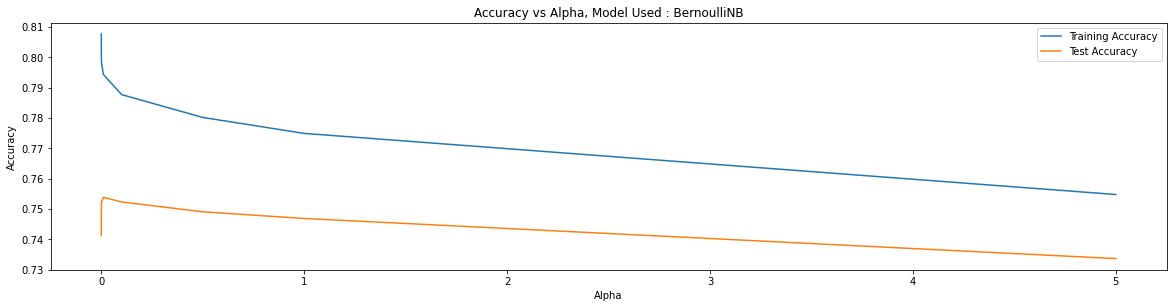

In [13]:
size = 10
import matplotlib.pyplot as plt
# plotting the loss vs iteration graph for training and validation data
figure = plt.figure(1, figsize=(20,10))
subplot  = figure.add_subplot(212)
# subplot.tick_params(labelrotation=90)
subplot.plot(arr[0:size], train_score[0:size], label = "Training Accuracy")
subplot.plot(arr[0:size], test_score[0:size], label = "Test Accuracy")
# subplot.scatter(X_iteration, Y_train_error)
subplot.set_title("Accuracy vs Alpha, Model Used : BernoulliNB")
subplot.set_xlabel("Alpha")
subplot.set_ylabel("Accuracy")
subplot.legend(loc="upper right")





In [19]:
"""  ------------ Best Model  -----------------"""

from sklearn.naive_bayes import BernoulliNB 

model = BernoulliNB(alpha = 0.01, binarize = 0.5)
model.fit(X_train, Y_train)

#Classification Report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# print("")
print("Classification Report:Training")
print(classification_report(Y_train, y_pred_train))

print("Classification Report:Testing")
print(classification_report(Y_test, y_pred_test))

#saving the classifier 
import joblib

joblib_file = "BernoulliNB_model.pkl"  
joblib.dump(model, joblib_file)



Classification Report:Training
              precision    recall  f1-score   support

         1.0       0.64      0.75      0.69       735
         2.0       0.72      0.57      0.64       755
         3.0       0.95      0.93      0.94       779
         4.0       0.89      0.83      0.86       752
         5.0       0.95      0.93      0.94       767
         6.0       0.70      0.89      0.78       730
         7.0       0.93      0.87      0.90       743
         8.0       0.99      0.97      0.98       754
         9.0       0.98      0.93      0.95       741
        10.0       0.63      0.60      0.62       753
        11.0       0.73      0.80      0.76       738
        12.0       0.76      0.68      0.72       744
        13.0       0.98      0.97      0.97       742
        14.0       0.84      0.56      0.68       762
        15.0       0.58      0.57      0.58       769
        16.0       0.27      0.32      0.29       729
        17.0       0.81      0.82      0.81      